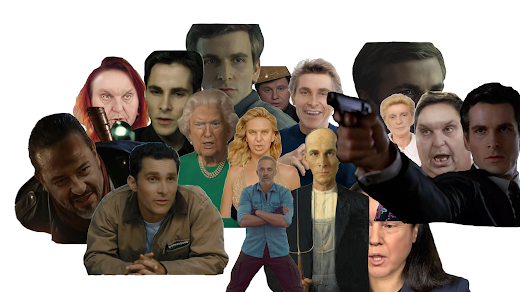

# **Welcome to Wav2Lip colab mod by Ten Deepfake**

# **There is no need for colab pro to use it.**
[Youtube](https://www.youtube.com/user/zabique) [Discord](https://discord.gg/dhfTaR7W88) [E-mail](mailto:tendeepfake@gmail.com
)



---



# **Check GPU**

*   Google Colab can provide you with one of Tesla graphics cards: K80, T4, P4, P100 and V100
*   Here you can check the model of GPU before using Wav2Lip

In [ ]:
#@title Start
!nvidia-smi

Sat Apr 30 20:17:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------



---



# **Mount your Google drive**

1. Connect to your google drive to be able to import previously saved Wave2lip model files.
2. Ctrl+v auth key and hit ENTER




In [ ]:
#@title Start
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive




---



# **Get the code and models**

# **Add this shortcut of my wav2lip folder to your drive (skip if already got model files on your gdrive):**
[Click here to add shortcut](https://drive.google.com/drive/folders/1cxf6ywJZGWX_fuFbgyxTCEDiLn-BJgr9?usp=sharing)



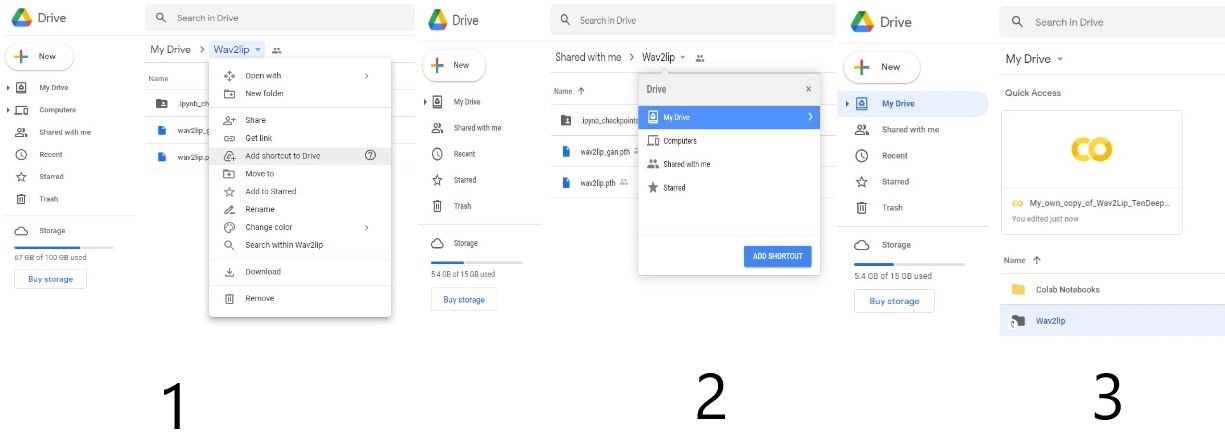

# **Alternatively download both files from here and put them in root of your google drive inside of /Wav2Lip/ folder.**
1. [Wav2Lip	Highly accurate lip-sync](https://iiitaphyd-my.sharepoint.com/:u:/g/personal/radrabha_m_research_iiit_ac_in/Eb3LEzbfuKlJiR600lQWRxgBIY27JZg80f7V9jtMfbNDaQ?e=TBFBVW)
2. [Wav2Lip + GAN	Slightly inferior lip-sync, but better visual quality](https://iiitaphyd-my.sharepoint.com/:u:/g/personal/radrabha_m_research_iiit_ac_in/EdjI7bZlgApMqsVoEUUXpLsBxqXbn5z8VTmoxp55YNDcIA?e=n9ljGW)

**If none of the links work, go to official wav2lip github to find them.**
[HERE](https://github.com/Rudrabha/Wav2Lip#training-on-datasets-other-than-lrs2)



---



In [ ]:
#@title Clone Wav2Lip github repo
!git clone https://github.com/Rudrabha/Wav2Lip.git

Cloning into 'Wav2Lip'...
remote: Enumerating objects: 360, done.
remote: Total 360 (delta 0), reused 0 (delta 0), pack-reused 360
Receiving objects: 100% (360/360), 522.32 KiB | 1.51 MiB/s, done.
Resolving deltas: 100% (198/198), done.


In [ ]:
#@title Uninstall tensorflow - Confirm with y [ enter ]
!pip install tensorflow tensorflow-gpu
torchtext 0.12.0

     |████████████████████████████████| 497.5 MB 26 kB/s 
     |████████████████████████████████| 497.5 MB 31 kB/s 
     |████████████████████████████████| 462 kB 51.7 MB/s 
     |████████████████████████████████| 15.7 MB 35.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.17.1
    Uninstalling numpy-1.17.1:
      Successfully uninstalled numpy-1.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.1.0 which is incompatible.
kapre 0.3.7 requires librosa>=0.7.2, but you have librosa 0.7.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#@title Copy wav2lip_gan.pth, wav2lip.pth, face detection models & Requirements.txt
!cp -ri "/content/gdrive/MyDrive/Wav2lip/wav2lip_gan.pth" /content/Wav2Lip/checkpoints/
!cp -ri "/content/gdrive/MyDrive/Wav2lip/wav2lip.pth" /content/Wav2Lip/checkpoints/
!cd Wav2Lip && pip install -r requirements.txt
!wget "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" -O "Wav2Lip/face_detection/detection/sfd/s3fd.pth"

cp: overwrite '/content/Wav2Lip/checkpoints/wav2lip_gan.pth'? y
cp: overwrite '/content/Wav2Lip/checkpoints/wav2lip.pth'? y
  Using cached numpy-1.17.1-cp37-cp37m-manylinux1_x86_64.whl (20.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.1.0 which is incompatible.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.17.1 which is incompatible.
tensorflow-gpu 2.8.0 requires numpy>=1.20, but you have numpy 1.17.1 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.17.1 which is incompatible.
pywavelets 1.3.0 requires numpy>=1.17.3, but you have numpy 1.17.1 which is incompatible.
pandas 1.3.5 requires numpy>=1.17.



---



# **Quick guide**
1. Create video file input_video.mp4
2. Create audio file input_audio.wav
3. Both files have to be exact same length
4. Target face in the input_video.mp4, must be in ALL videoframes (So no black or blurry frames etc)


# **Now lets try!**



---



In [ ]:
#@title 1-4. Batch processing - Upload -> process -> download -> play result
%cd sample_data/
%rm input_audio.wav
%rm input_video.mp4
from google.colab import files
uploaded = files.upload()
%cd ..
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav"
from google.colab import files
files.download('/content/Wav2Lip/results/result_voice.mp4') 
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")



---



In [ ]:
#@title 1.Upload input_video.mp4 & input_audio.wav files
%cd sample_data/
from google.colab import files
uploaded = files.upload()
%cd ..

In [ ]:
#@title 2.Create Wav2Lip video (using wav2lip_gan.pth) GAN
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav"

In [ ]:
#@title 3.Play result video -  50% scaling
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
#@title 4.Download Result.mp4 to your computer
from google.colab import files
files.download('/content/Wav2Lip/results/result_voice.mp4') 


# **Variations to try**


In [ ]:
#@title 1.Create Wav2Lip video (using wav2lip.pth) NON-GAN
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav"

In [ ]:
#@title 2.Use resize_factor to reduce the video resolution, as there is a change you might get better results for lower resolution videos. Why? Because the model was trained on low resolution faces.
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav" --resize_factor 2

In [ ]:
#@title 3.Use more padding to include the chin region (u can manually edit pads dimensions viewing and changing the code)
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav" --pads 0 20 0 0

In [ ]:
#@title 4.Play result video -  50% scaling
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
#@title 5.Download Result.mp4 to your computer
from google.colab import files
files.download('/content/Wav2Lip/results/result_voice.mp4') 
